<h1 style='color:#065164; font-size:45px'><center>Loan Amount Prediction</center></h1>

<h1 style='color:#065164; font-size:35px'><center>Apply Linear Regression</center></h1>

<h2 style='color:#065164'>1. Import Dependencies</h2>

In [71]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#set bc seaborn as the defualt
#sns.set_theme()

import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

<h2 style='color:#065164'>2. Loan Dataset</h2>

In [72]:
#set full display all features
pd.set_option('display.max_columns', None)
data = pd.read_csv('loan_prediction_dataset.csv')
data.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,163477201,5000,5000,5000,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,2 years,RENT,50000.0,Source Verified,Dec-19,Current,debt_consolidation,Debt consolidation,128xx,NY,15.17,0,May-08,685,689,1,NaN,NaN,4,0,2453,81.80%,6,f,4619.31,4619.31,713.09,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36 months,12.40%,668.12,B,B4,NaN,< 1 year,RENT,13000.0,Verified,Dec-19,Current,small_business,Business,986xx,WA,79.59,0,Dec-10,665,669,2,NaN,94.0,6,1,12325,59.30%,9,f,19058.87,19058.87,1315.57,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,480xx,MI,35.07,0,Dec-88,695,699,0,NaN,NaN,26,0,79282,46.40%,50,w,31476.80,31476.80,3115.05,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20


<h2 style='color:#065164'>3. Data Wrangling & Preprocessing</h2>

In [73]:
print("Number Of Dimension:", data.shape[1])
print("*" * 50)
print("Number Of Samples:", data.shape[0])

Number Of Dimension: 47
**************************************************
Number Of Samples: 128258


In [74]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128258 entries, 0 to 128257
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       128258 non-null  int64  
 1   loan_amnt                128258 non-null  int64  
 2   funded_amnt              128258 non-null  int64  
 3   funded_amnt_inv          128258 non-null  int64  
 4   term                     128258 non-null  object 
 5   int_rate                 128258 non-null  object 
 6   installment              128258 non-null  float64
 7   grade                    128258 non-null  object 
 8   sub_grade                128258 non-null  object 
 9   emp_title                109087 non-null  object 
 10  emp_length               117027 non-null  object 
 11  home_ownership           128258 non-null  object 
 12  annual_inc               128258 non-null  float64
 13  verification_status      128258 non-null  object 
 14  issu

In [76]:
#check missing value if there are any missing data.
missing_value = data.isnull().sum()
percent_missing_value = missing_value / len(data)
print("*" * 50)
print("Missing value:", missing_value)
print("*" * 50)
print("Pecent of Missing value:", percent_missing_value)

**************************************************
Missing value: id                              0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                   19171
emp_length                  11231
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                           231
delinq_2yrs                     0
earliest_cr_line                0
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                  0
mths_since_last_delinq      72115
mths_since_last_

In [77]:
#rename features
data.rename(columns={
    'id':'id',
    'loan_amnt' : 'loan_amount',  
    'funded_amnt':'funded_amount',
    'funded_amnt_inv':'funded_amount_investor',
    'term':'term',
    'int_rate': 'interest_rate',
    'installment':'installment',
    'grade':'loan_grade',
    'sub_grade':'loan_sub_grade',
    'emp_title':'borrower_job_title',
    'emp_length':'borrower_length_expereince',
    'home_ownership':'home_ownership',
    'annual_inc':'borrower_annual_income',
    'verification_status':'loan_verification_status',
    'issue_d':'date_loan_funded',
    'loan_status':'loan_status',
    'purpose':'borrower_purpose',
    'title':'loan_title',
    'zip_code':'borrower_zip_code',
    'addr_state':'address_state',
    'dti':'debt_to_income',
    'delinq_2yrs':'borrower_delinquency_last_2y',
    'earliest_cr_line':'date_credit_line_open',
    'fico_range_low':'fico_rage_low',
    'fico_range_high':'fico_range_high',
    'inq_last_6mths':'number_inquiry_last_6mo',  
    'mths_since_last_delinq':'borrower_delinquency_last_6mo',
    'mths_since_last_record':'borrower_delinquency_public_record',  
    'open_acc':'number_credit_line',
    'pub_rec':'number_deliquency_public_record',
    'revol_bal':'credit_revolve_balance', 
    'revol_util':'credit_revolve_utilization',   
    'total_acc':'total_credit_line',  
    'initial_list_status':'initial_list_status',  
    'out_prncp':'outstanding_principal', 
    'out_prncp_inv':'outstanding_pricipal_investor', 
    'total_pymnt':'total_payment',
    'total_pymnt_inv':'total_payment_investor',
    'total_rec_prncp':'total_receive_principal',
    'total_rec_int':'total_receive_investor',
    'total_rec_late_fee':'toal_receive_late_fee',
    'recoveries':'recoveries',
    'collection_recovery_fee':'collection_recovery_fee',
    'last_pymnt_d':'last_payment_date', 
    'last_pymnt_amnt':'last_payment_amount',
    'next_pymnt_d':'next_payment_date',
    'last_credit_pull_d':'last_credit_pull_date'                    
}, inplace=True)
data.head(3)

,id,loan_amount,funded_amount,funded_amount_investor,term,interest_rate,installment,loan_grade,loan_sub_grade,borrower_job_title,borrower_length_expereince,home_ownership,borrower_annual_income,loan_verification_status,date_loan_funded,loan_status,borrower_purpose,loan_title,borrower_zip_code,address_state,debt_to_income,borrower_delinquency_last_2y,date_credit_line_open,fico_rage_low,fico_range_high,number_inquiry_last_6mo,borrower_delinquency_last_6mo,borrower_delinquency_public_record,number_credit_line,number_deliquency_public_record,credit_revolve_balance,credit_revolve_utilization,total_credit_line,initial_list_status,outstanding_principal,outstanding_pricipal_investor,total_payment,total_payment_investor,total_receive_principal,total_receive_investor,toal_receive_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date
0,163477201,5000,5000,5000,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,2 years,RENT,50000.0,Source Verified,Dec-19,Current,debt_consolidation,Debt consolidation,128xx,NY,15.17,0,May-08,685,689,1,NaN,NaN,4,0,2453,81.80%,6,f,4619.31,4619.31,713.09,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36 months,12.40%,668.12,B,B4,NaN,< 1 year,RENT,13000.0,Verified,Dec-19,Current,small_business,Business,986xx,WA,79.59,0,Dec-10,665,669,2,NaN,94.0,6,1,12325,59.30%,9,f,19058.87,19058.87,1315.57,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,480xx,MI,35.07,0,Dec-88,695,699,0,NaN,NaN,26,0,79282,46.40%,50,w,31476.80,31476.80,3115.05,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20


In [78]:
#Descriptive Statistic
data.describe()
#data.describe(include='all')

,id,loan_amount,funded_amount,funded_amount_investor,installment,borrower_annual_income,debt_to_income,borrower_delinquency_last_2y,fico_rage_low,fico_range_high,number_inquiry_last_6mo,borrower_delinquency_last_6mo,borrower_delinquency_public_record,number_credit_line,number_deliquency_public_record,credit_revolve_balance,total_credit_line,outstanding_principal,outstanding_pricipal_investor,total_payment,total_payment_investor,total_receive_principal,total_receive_investor,toal_receive_late_fee,recoveries,collection_recovery_fee,last_payment_amount
count,1.282580e+05,128258.000000,128258.000000,128258.000000,128258.000000,1.282580e+05,128027.000000,128258.000000,128258.000000,128258.000000,128258.000000,56143.000000,12944.000000,128258.000000,128258.000000,1.282580e+05,128258.000000,128258.000000,128258.000000,128258.000000,128258.000000,128258.000000,128258.000000,128258.00000,128258.000000,128258.000000,128258.000000
mean,1.616446e+08,16276.080634,16276.080634,16273.393083,470.932802,8.579460e+04,21.066422,0.236710,704.961562,708.961780,0.528918,36.310635,86.693989,11.802094,0.102356,1.786384e+04,23.336416,13574.234968,13572.065368,3527.923225,3527.313842,2613.861391,912.093107,0.18927,1.779427,0.062696,1141.535812
std,1.350068e+06,10281.910603,10281.910603,10281.072014,289.988822,1.031360e+05,19.717719,0.757576,34.976477,34.977355,0.790365,21.772777,23.057294,6.028849,0.308649,2.336172e+04,12.428671,9781.778293,9781.009799,4387.187445,4386.798458,4249.054535,725.410296,2.77064,146.306181,8.518903,3862.617777
min,1.571072e+08,1000.000000,1000.000000,975.000000,30.640000,0.000000e+00,0.000000,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-9304.140000
25%,1.605352e+08,8400.000000,8400.000000,8400.000000,254.797500,5.000000e+04,12.950000,0.000000,680.000000,684.000000,0.000000,19.000000,71.000000,8.000000,0.000000,6.124000e+03,14.000000,5944.320000,5941.917500,1473.940000,1473.730000,890.777500,370.862500,0.00000,0.000000,0.000000,143.222500
50%,1.616534e+08,14000.000000,14000.000000,14000.000000,396.920000,7.000000e+04,19.270000,0.000000,700.000000,704.000000,0.000000,33.000000,91.000000,11.000000,0.000000,1.203200e+04,21.000000,11383.610000,11380.995000,2396.950000,2396.190000,1497.555000,720.260000,0.00000,0.000000,0.000000,343.240000
75%,1.627605e+08,22525.000000,22525.000000,22525.000000,634.230000,1.000000e+05,26.530000,0.000000,725.000000,729.000000,1.000000,52.000000,106.000000,15.000000,0.000000,2.180700e+04,30.000000,19627.445000,19623.107500,3971.155000,3970.850000,2552.447500,1257.157500,0.00000,0.000000,0.000000,628.490000
max,1.641932e+08,40000.000000,40000.000000,40000.000000,1671.880000,9.682505e+06,999.000000,23.000000,845.000000,850.000000,5.000000,161.000000,119.000000,104.000000,5.000000,1.678904e+06,145.000000,39581.240000,39581.240000,45537.600000,45537.600000,40000.000000,7011.280000,142.29000,23040.000000,1557.468000,41557.180000


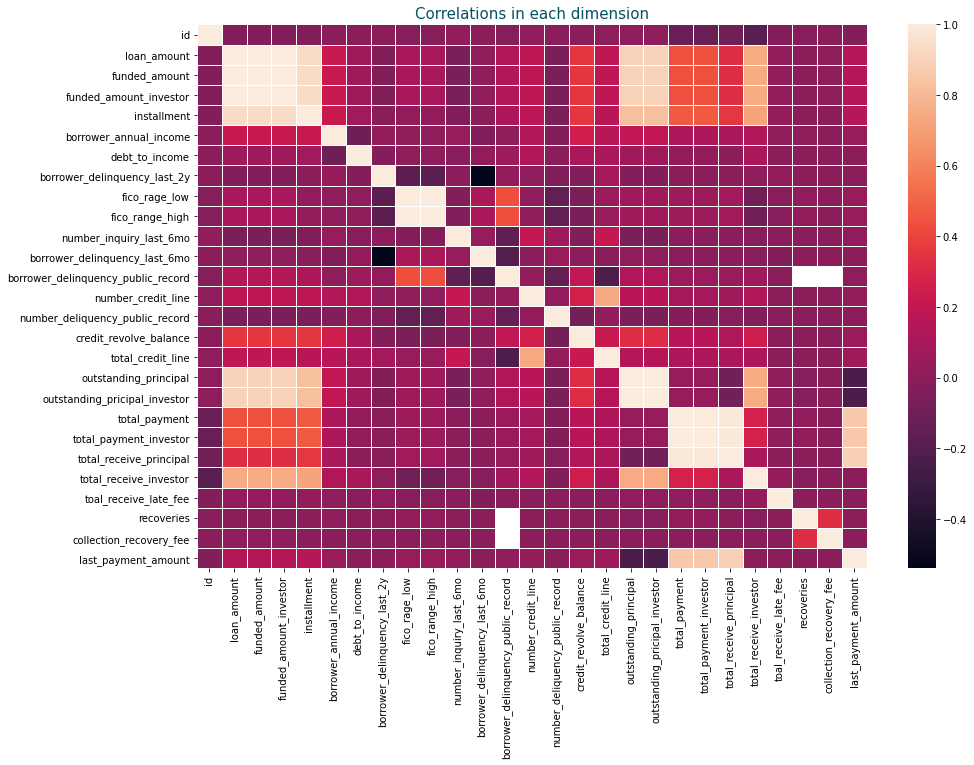

In [79]:
correlations = data.corr(method='pearson')
#we wanna show u via heatmap
#we use seaborn library to visualize (heatmap)
plt.subplots(figsize=(15,10))
sns.heatmap(correlations, 
           xticklabels=correlations.columns.values,
           yticklabels=correlations.columns.values,linewidths=.5)
           #, height=5, aspect=11/4)
plt.title('Correlations in each dimension', fontsize='15', color='#065164')
plt.show()

In [80]:
#Change datatype some dimensions
#we need to convert some dimension to string type before using str.replace() function
data.interest_rate = data.interest_rate.astype(str)
data['interest_rate'] = data['interest_rate'].str.replace('%','').astype(float)

data.term = data.term.astype(str)
data['term'] = data['term'].str.replace('months','').astype(int)

data.credit_revolve_utilization = data.credit_revolve_utilization.astype(str)
data['credit_revolve_utilization'] = data['credit_revolve_utilization'].str.replace('%','').astype(float)

#borrower_length_expereince, borrower_zip_code
data.borrower_length_expereince = data.borrower_length_expereince.astype(str)

data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('year','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('<','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('+','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('s','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('nan','0')

data["borrower_delinquency_last_6mo"] = data["borrower_delinquency_last_6mo"].fillna(0)
data["borrower_delinquency_public_record"] = data["borrower_delinquency_public_record"].fillna(0)
data["credit_revolve_utilization"] = data["credit_revolve_utilization"].fillna(0)
data["borrower_length_expereince"] = data["borrower_length_expereince"].fillna(0)
data["borrower_job_title"] = data["borrower_job_title"].fillna(0)

data.borrower_zip_code = data.borrower_zip_code.astype(str)
data['borrower_zip_code'] = data['borrower_zip_code'].str.replace('xx','')

In [81]:
#check the duplicate values in each samples
total_sample = data.shape[0]
duplicate_sample = data.duplicated(subset=['id', 'loan_amount','borrower_job_title'], keep='first')
count_duplicate_sample = duplicate_sample.value_counts()

print("+-" * 58)
print("Duplicate Value:", count_duplicate_sample)
print("+-" * 58)
#False, it means dataset has no duplicate value

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Duplicate Value: False    128258
dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


In [82]:
#RENT = 1
#MORTGAGE = 2
#OWN = 3
#ANY = 4
data.home_ownership = data.home_ownership.astype(str)
data['home_ownership']  = data['home_ownership'].str.replace('RENT', '1')
data['home_ownership']  = data['home_ownership'].str.replace('MORTGAGE', '2')
data['home_ownership']  = data['home_ownership'].str.replace('OWN', '3')
data['home_ownership']  = data['home_ownership'].str.replace('ANY', '4')

In [83]:
#remove white place using strip
data['borrower_job_title'] = data['borrower_job_title'].str.rstrip('123.!? \n\t')
#convert to string
data.borrower_job_title = str(data['borrower_job_title'])

#data['borrower_job_title'] = data['borrower_job_title'].str.replace(' ',',')
#data["#borrower_job_title"] = data["borrower_job_title"].apply(lambda x: len(x.split(' ')))

In [84]:
data.head(3)

,id,loan_amount,funded_amount,funded_amount_investor,term,interest_rate,installment,loan_grade,loan_sub_grade,borrower_job_title,borrower_length_expereince,home_ownership,borrower_annual_income,loan_verification_status,date_loan_funded,loan_status,borrower_purpose,loan_title,borrower_zip_code,address_state,debt_to_income,borrower_delinquency_last_2y,date_credit_line_open,fico_rage_low,fico_range_high,number_inquiry_last_6mo,borrower_delinquency_last_6mo,borrower_delinquency_public_record,number_credit_line,number_deliquency_public_record,credit_revolve_balance,credit_revolve_utilization,total_credit_line,initial_list_status,outstanding_principal,outstanding_pricipal_investor,total_payment,total_payment_investor,total_receive_principal,total_receive_investor,toal_receive_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date
0,163477201,5000,5000,5000,36,17.74,180.12,C,C5,0 Lead Mtc Tech\n1 ...,2,1,50000.0,Source Verified,Dec-19,Current,debt_consolidation,Debt consolidation,128,NY,15.17,0,May-08,685,689,1,0.0,0.0,4,0,2453,81.8,6,f,4619.31,4619.31,713.09,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36,12.40,668.12,B,B4,0 Lead Mtc Tech\n1 ...,1,1,13000.0,Verified,Dec-19,Current,small_business,Business,986,WA,79.59,0,Dec-10,665,669,2,0.0,94.0,6,1,12325,59.3,9,f,19058.87,19058.87,1315.57,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60,15.24,789.24,C,C2,0 Lead Mtc Tech\n1 ...,10,2,84000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,480,MI,35.07,0,Dec-88,695,699,0,0.0,0.0,26,0,79282,46.4,50,w,31476.80,31476.80,3115.05,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20


<h2 style='color:#065164'>4. Training Model</h2>

In [85]:
df = data[['loan_amount', 'installment', 'term', 'borrower_annual_income','borrower_length_expereince',
          'home_ownership','address_state' ]]

In [86]:
#convert category variable to numberical variable
#df['job_title'] = pd.factorize(df.borrower_job_title)[0]

In [87]:
#df.drop(['borrower_job_title'], axis=1, inplace=True)

In [88]:
# convert categorical variable to numberical variable
df.home_ownership = df.home_ownership.astype('category').cat.codes
df.address_state = df.address_state.astype('category').cat.codes
#df.job_title = df.job_title.astype('category').cat.codes
# convert from annual income to monthly income
df.borrower_annual_income = df.borrower_annual_income / 12

# rename a feature
df.rename(columns={'borrower_annual_income':'borrower_month_income'}, inplace=True)

In [89]:
#Check number of null
print(df.isnull().sum())
print("@@" * 58)
print(df.shape)

loan_amount                   0
installment                   0
term                          0
borrower_month_income         0
borrower_length_expereince    0
home_ownership                0
address_state                 0
dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
(128258, 7)


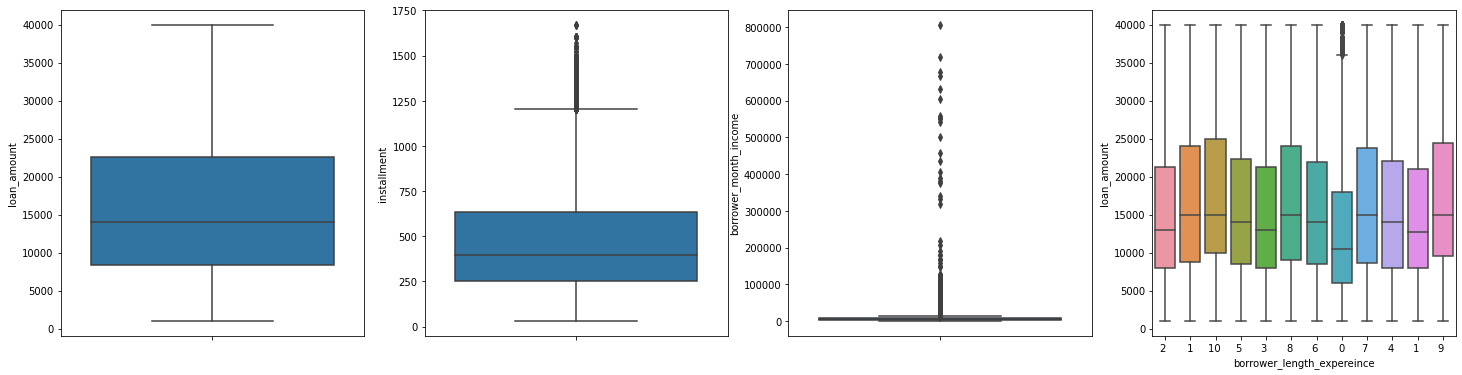

In [90]:
#check outlier 
f, axes = plt.subplots(ncols=4, figsize=(25, 6))

sns.boxplot(y=df['loan_amount'], ax=axes[0])
sns.boxplot(y=df['installment'], ax=axes[1])
sns.boxplot(y=df['borrower_month_income'], ax=axes[2])
sns.boxplot(x=df['borrower_length_expereince'], y=df['loan_amount'], ax=axes[3])

plt.show()

In [91]:
#remove outlier from dataset
from scipy.stats import zscore

#create two columns more of zscore value
df['installment_zscore'] = zscore(df.installment)
df['borrower_month_income_zscore'] = zscore(df.borrower_month_income)

#define zscore.
#Z score is in (-3,3) value, if it's out means that it has outlier
df[(df.installment_zscore > 3.0) | (df.installment_zscore < -3.0)]
df[(df.borrower_month_income_zscore > 3.0) | (df.borrower_month_income_zscore < -3.0)]

#drop z_score
df = df.drop(df[ (df.installment_zscore > 3.0) | (df.installment_zscore < -3.0)].index)
df = df.drop(df[ (df.borrower_month_income_zscore > 3.0) | (df.borrower_month_income_zscore < -3.0)].index)

In [92]:
#print shape
#before drop 128258  rows and 10 columns
df.shape

(127208, 9)

In [93]:
#drop columns just modified
df.drop(['installment_zscore','borrower_month_income_zscore'], axis=1, inplace=True)

In [94]:
#print the unique value in each dimensions
print("**" * 58)
print("Term:", df['term'].unique())
print("**" * 58)
print("Borrower Length Experience:",df['borrower_length_expereince'].unique())
print("**" * 58)
print("Home Ownership",df['home_ownership'].unique())
print("**" * 58)
print("Address State",df['address_state'].unique())
print("**" * 58)

********************************************************************************************************************
Term: [36 60]
********************************************************************************************************************
Borrower Length Experience: ['2 ' ' 1 ' '10 ' '5 ' '3 ' '8 ' '6 ' '0' '7 ' '4 ' '1 ' '9 ']
********************************************************************************************************************
Home Ownership [0 1 2 3]
********************************************************************************************************************
Address State [33 46 21 34 10  9 30 42 47  4 18 43 37 13 19 32 11 29  3  8  5 24 25 15
 44  2 49 41 26  6 12 17 36  1 22 14 35 48 31 39  7 23 27 16  0 20 45 38
 28 40]
********************************************************************************************************************


In [95]:
# compute correlation coefficent between variables
pearson_correlation = df.corr(method='pearson')
pearson_correlation

,loan_amount,installment,term,borrower_month_income,home_ownership,address_state
loan_amount,1.000000,0.936385,0.372311,0.400180,0.085913,-0.008826
installment,0.936385,1.000000,0.096943,0.396089,0.067846,-0.014599
term,0.372311,0.096943,1.000000,0.059901,0.055784,0.007559
borrower_month_income,0.400180,0.396089,0.059901,1.000000,0.096758,-0.017082
home_ownership,0.085913,0.067846,0.055784,0.096758,1.000000,0.065164
address_state,-0.008826,-0.014599,0.007559,-0.017082,0.065164,1.000000


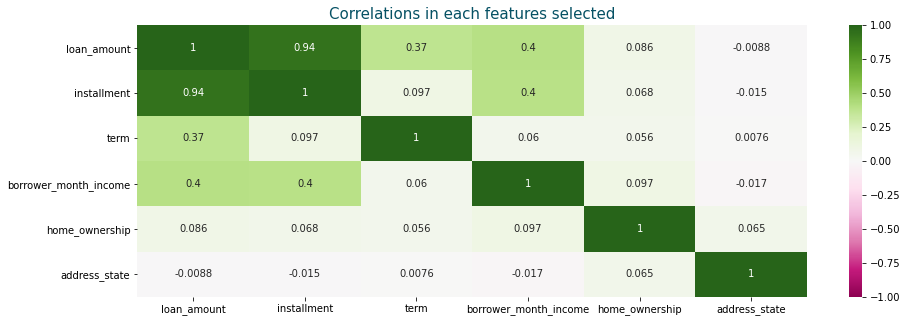

In [96]:
# plot correlation coefficent using heatmap
plt.subplots(figsize=(15,5))
sns.heatmap(pearson_correlation, cmap='PiYG', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlations in each features selected', fontsize='15', color='#065164')
plt.show()

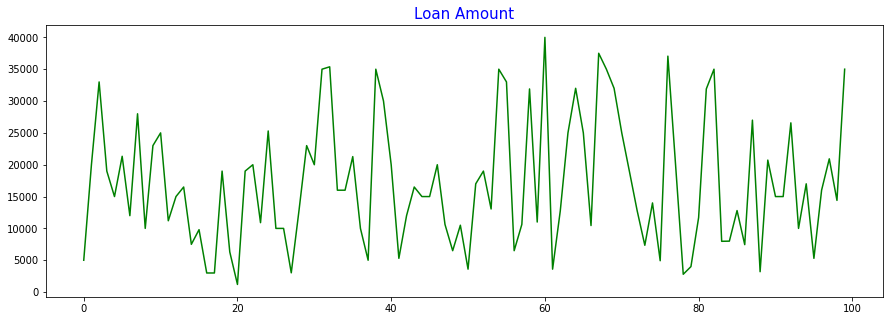

In [97]:
plt.figure(figsize=(15,5))
plt.plot(df['loan_amount'][0:100], color='g')
plt.title("Loan Amount", fontsize=15, color='b')
plt.show()

In [98]:
#Define X,y for train_test_split
x = df.drop(['loan_amount'], axis=1)
y = df['loan_amount']

In [99]:
#Apply train_test_split funtion to random dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)

In [100]:
#set l_model 
l_model = linear_model.LinearRegression()

In [101]:
%%time
#Train the model
model = l_model.fit(x_train, y_train)

CPU times: user 108 ms, sys: 165 ms, total: 273 ms
Wall time: 85 ms


In [102]:
# learned parameters
weights = model.coef_
bias = model.intercept_

#Linear: y = ax + b
#Linear: y = weight(x)  + Bias

print('Model parameters as follows:')
#print(df.feature_names)
print("--" * 58)
print("+++ Coeffients: +++")
for i in weights:
    print(i)
print("--" * 58)
print("+++ Interceptor: +++")
print('Bias: ', bias)

Model parameters as follows:
--------------------------------------------------------------------------------------------------------------------
+++ Coeffients: +++
32.11593203740464
253.60001454608886
0.06576159218619182
7.485845871513259
91.32276254630283
1.367185271884834
--------------------------------------------------------------------------------------------------------------------
+++ Interceptor: +++
Bias:  -10588.97944468462


In [103]:
#select features or variable of dataset
for i in x.columns:
    print(i)

#Y
#   Y = 32.1017851282445 * (installment) + 254.00680449860815 * (term) + 
#       7.056018279568589 * (borrower_length_expereince) + 94.30488617456618 * (home_ownership) +
#       0.06515518426990631 * (borrower_month_income) + (-242.86514335520073) * number_deliquency_public_record
#       + 1.1798031205461694 * (address_state)


installment
term
borrower_month_income
borrower_length_expereince
home_ownership
address_state


<h2 style='color:#065164'>5. Model Evaluation</h2>

In [104]:
#Try to prediction & test
y_prediction = l_model.predict(x_test)

In [105]:
#The result of prediction
y_prediction[0:10]

array([31320.5194275 ,  2114.97003336, 21658.64188277,  9006.06472569,
       22614.57109751, 23343.94757497, 16045.67566672,  7783.82302054,
       33528.67786917, 33209.42506002])

In [106]:
#check the result
y_prediction_values = pd.DataFrame(list(zip(y_test[0:10], y_prediction[0:10])), 
                                     columns=['Y Test', 'Y Predicted'])
y_prediction_values.head(10)

,Y Test,Y Predicted
0,31575,31320.519427
1,3000,2114.970033
2,24000,21658.641883
3,8500,9006.064726
4,25000,22614.571098
5,20000,23343.947575
6,16000,16045.675667
7,9000,7783.823021
8,28150,33528.677869
9,39450,33209.425060


In [107]:
# calculat evaluation measures: mean-square-error and r2-score
mse = metrics.mean_squared_error(y_test, y_prediction)
mae = metrics.mean_absolute_error(y_test, y_prediction)
r2 = metrics.r2_score(y_test, y_prediction)

print("##" * 58)
print('Mean squared error: ', mse)
print("##" * 58)
print('Mean absolute error: ', mae)
print("##" * 58)
print('R2 score: ', r2)
print("##" * 58)

####################################################################################################################
Mean squared error:  4441423.343978349
####################################################################################################################
Mean absolute error:  1472.2630469670632
####################################################################################################################
R2 score:  0.9577194697498559
####################################################################################################################


In [108]:
#Check train data score of model
train_score = l_model.score(x_train, y_train)
print("Model Score:", train_score)
print("**" * 58)
print("Model Score (%) :", train_score * 100)

Model Score: 0.9574363112968004
********************************************************************************************************************
Model Score (%) : 95.74363112968004


In [109]:
#Check test data score of model
test_score = l_model.score(x_test, y_test)
print("Model Score:", test_score)
print("**" * 58)
print("Model Score (%) :", test_score * 100)

Model Score: 0.9577194697498559
********************************************************************************************************************
Model Score (%) : 95.77194697498558


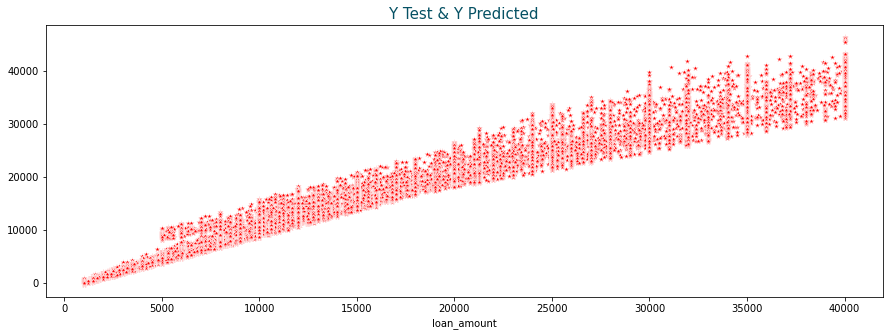

In [110]:
# scatter plot y_test, y_prediction
plt.figure(figsize=(15,5))
sns.scatterplot(y_test, y_prediction, marker="*", color='r', alpha=1) #alpha: make more resolution
#plt.plot(y_prediction, data=y_prediction)
plt.title('Y Test & Y Predicted', fontsize='15', color='#065164')
#plt.legend()
plt.show()

In [111]:
# visualize the predicted value with real value
#plt.figure(figsize=(15, 5))

#plt.plot(y_test.values, label='Real value')
#plt.plot(y_prediction, label='Predicted value', color='r')

#plt.title('Loan Amount Predictoin', fontsize='15', color='#065164')
#plt.xlabel('Test Data')
#plt.ylabel('Loan Amount ($) ')
#plt.legend()
#plt.show()

In [112]:
#set it as dataframe
prediction_values = pd.DataFrame(list(zip(y_prediction, y_test)), columns=['predicted_loan_amount', 
                                                                           'real_loan_amount'])

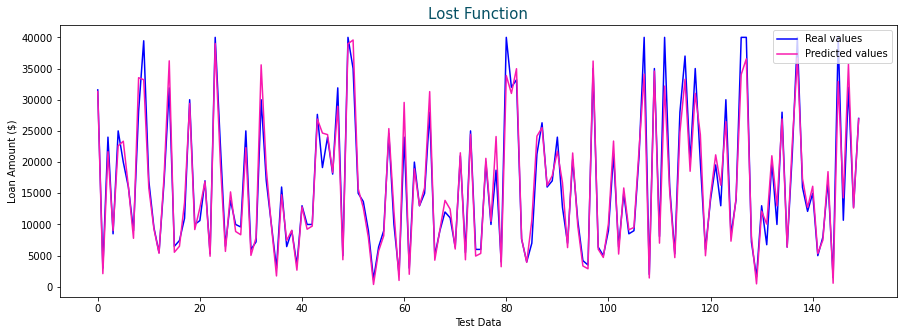

   predicted_loan_amount  real_loan_amount
0           31320.519427             31575
1            2114.970033              3000
2           21658.641883             24000
3            9006.064726              8500
4           22614.571098             25000


In [113]:
plt.figure(figsize=(15, 5))

plt.plot(y_test[0:150].ravel(), label='Real values', color='b')
plt.plot(prediction_values['predicted_loan_amount'][0:150].ravel(), label='Predicted values', color='#F91AAF')

plt.title('Lost Function',fontsize='15', color='#065164')
plt.xlabel('Test Data')
plt.ylabel('Loan Amount ($)')
plt.legend(loc=1)
plt.show()
print(prediction_values.head())

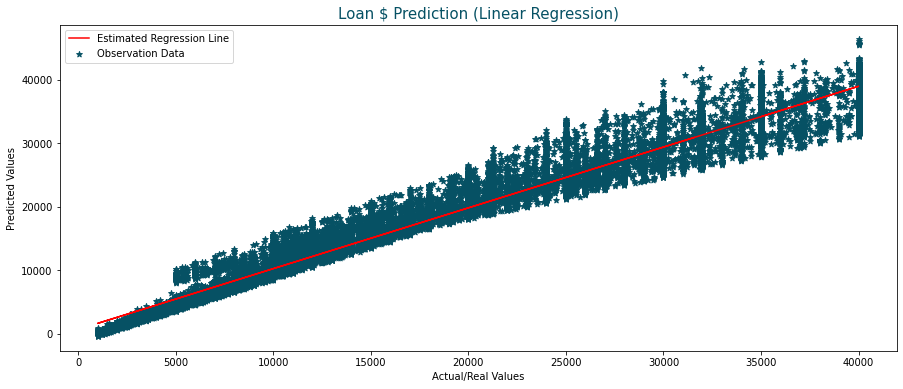

In [114]:
#Plot the results 
#Plot data ft scatter plot
#ravel() function can solve the problem replace to values() function

fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(y_test, y_prediction, color='#065164', marker='*')
ax.set_xlabel('Actual/Real Values')
ax.set_ylabel('Predicted Values')

#Draw a regression line
y_test, y_prediction = y_test.ravel().reshape(-1,1), y_prediction.ravel().reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_prediction).predict(y_test), color='r')
plt.title("Loan $ Prediction (Linear Regression)", color="#065164",fontsize='15')
plt.legend(['Estimated Regression Line', 'Observation Data'])

plt.show()

<h2 style='color:#065164'>6. Hyperparameter Tuning 1</h2>

In [115]:
#Apply k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection  import cross_val_score
from sklearn import model_selection

In [116]:
#set cross validation
#n_split = 5
# test_size = 0.3
#cv = ShuffleSplit(n_splits=5 , test_size=0.3 , random_state=10)
kfold = model_selection.KFold(n_splits=5, random_state=7, shuffle=True )


In [117]:
#process cross validation 
#apply 5-vold cross validation to linear regression
cross_validation_score = cross_val_score(l_model, x, y, cv=kfold)
#print the result
print("++" * 58)
print("Number of Score in each Iteration: ")
print("++" * 58)
for i in cross_validation_score:
    print(i)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Number of Score in each Iteration: 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0.9581063028188352
0.9579642114505081
0.9568009579357517
0.9573959269122417
0.9573259383778692


In [118]:
#select best model accuracy score
print("Best Model Accuray Score in K-Fold Cross Validation")
print(cross_validation_score.mean())

Best Model Accuray Score in K-Fold Cross Validation
0.9575186674990412


<h2 style='color:#065164'>6. Hyperparameter Tuning 2</h2>

In [119]:
#select loan amount greater than average
df1 = df.copy()
df1.where(df1['loan_amount'] >= df1['loan_amount'].mean(), inplace=True)

In [120]:
#drop loan amount less than average
df1.dropna(axis=0, inplace=True)

In [121]:
#covert data type
df1.term = df1.term.astype(int)
df1.borrower_length_expereince = df1.borrower_length_expereince.astype(int)
df1.home_ownership = df1.home_ownership.astype(int)

In [122]:
# the dataset after tuning
print("Rows:", df1.shape[0])
print("Columns:", df1.shape[1])

Rows: 50335
Columns: 7


In [123]:
#Define X,y for train_test_split
X1 = df1.drop(['loan_amount'], axis=1)
Y1 = df1['loan_amount']

In [124]:
#split data
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,Y1, test_size=0.2, random_state=123)

In [125]:
#train the model
l_model_2 = linear_model.LinearRegression()
model_2 = l_model.fit(x_train1, y_train1)

In [126]:
# learned parameters
weights = model_2.coef_
bias = model_2.intercept_

#Linear: y = ax + b
#Linear: y = weight(x)  + Bias

print('Model parameters as follows:')
print("--" * 58)
print("+++ Coeffients: +++")
for i in weights:
    print(i)
print("--" * 58)
print("+++ Interceptor: +++")
print('Bias: ', bias)

Model parameters as follows:
--------------------------------------------------------------------------------------------------------------------
+++ Coeffients: +++
33.117183799407165
358.580980699686
0.08769012152595224
9.59704887700444
159.08759968607075
2.9269050356502126
--------------------------------------------------------------------------------------------------------------------
+++ Interceptor: +++
Bias:  -16352.24687429519


In [127]:
#make prediction for model 2
y_prediction_2 = model_2.predict(x_test1)

In [128]:
#set it as dataframe
#display real and predict values
new_prediction_values = pd.DataFrame(list(zip(y_test1, y_prediction_2)), 
                                     columns=['y_test1', 'y_prediction_2'])
new_prediction_values.head()

,y_test1,y_prediction_2
0,18500.0,16506.061272
1,20000.0,25205.625775
2,22800.0,22898.624643
3,40000.0,35931.628335
4,25000.0,25893.105843


In [129]:
# calculat evaluation measures: mean-square-error and r2-score
mse_2 = metrics.mean_squared_error(y_test1, y_prediction_2)
mae_2 = metrics.mean_absolute_error(y_test1, y_prediction_2)
r2_2 = metrics.r2_score(y_test1, y_prediction_2)

print("##" * 58)
print('Mean squared error: ', mse_2)
print("##" * 58)
print('Mean absolute error: ', mae_2)
print("##" * 58)
print('R2 score: ', r2_2)
print("##" * 58)

####################################################################################################################
Mean squared error:  6437553.831898036
####################################################################################################################
Mean absolute error:  1981.7451845473677
####################################################################################################################
R2 score:  0.8772380795879571
####################################################################################################################


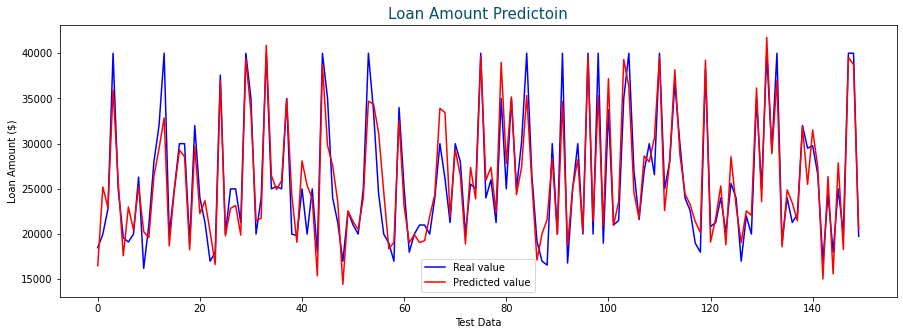

In [130]:
#set it as dataframe
prediction_values_2 = pd.DataFrame(list(zip(y_prediction_2, y_test1)), columns=['predicted_loan_amount', 
                                                                           'real_loan_amount'])

plt.figure(figsize=(15, 5))

plt.plot(y_test1[0:150].values, label='Real value', color='b')
plt.plot(prediction_values_2['predicted_loan_amount'][0:150].values, label='Predicted value', color='r')

plt.title('Loan Amount Predictoin',fontsize='15', color='#065164')
plt.xlabel('Test Data')
plt.ylabel('Loan Amount ($)')
plt.legend()
plt.show()

<h2 style='color:#065164'>7. Learning Curve</h2>

<p style='color:#065164' >A learning curve is the representation in graph form of the rate of learning something over time or repeated experiences</p>

<p style='color:blue'>Learning curve shows the testing and training error/score of a model for varying numbers of training samples. It helps to find out how much the model benefits from adding more training data and whether it suffers more from a variance error or a bias error</p>

In [131]:
#learning curve 
from sklearn.model_selection import learning_curve
#use learning curve
train_size, train_scores, test_scores = learning_curve(model, x, y, cv=5,# scoring='score', 
              n_jobs=-1, train_sizes=np.linspace(0.01, 1,50), verbose=1)

[learning_curve] Training set sizes: [  1017   3073   5129   7185   9242  11298  13354  15410  17466  19522
  21578  23634  25690  27746  29802  31858  33915  35971  38027  40083
  42139  44195  46251  48307  50363  52419  54475  56532  58588  60644
  62700  64756  66812  68868  70924  72980  75036  77092  79149  81205
  83261  85317  87373  89429  91485  93541  95597  97653  99709 101766]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.3s finished


In [132]:
#train_mean
train_mean = np.mean(train_scores, axis=1)
#train stadard deviation
train_std = np.std(train_scores, axis=1)
#test mean
test_mean = np.mean(test_scores, axis=1)
#test standard deviation
test_std = np.mean(test_scores, axis=1)

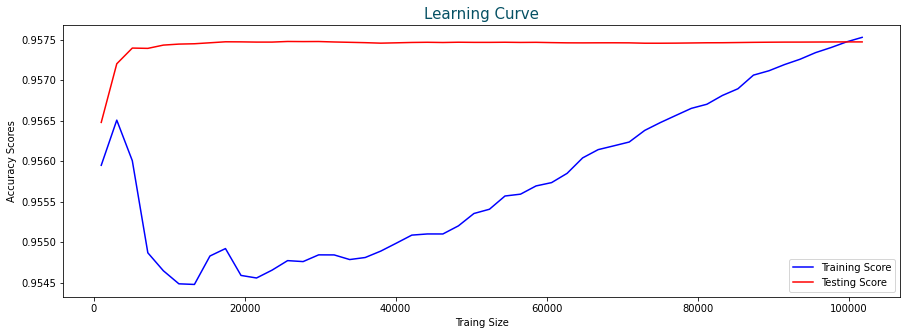

In [133]:
#plot learning curve
plt.figure(figsize=(15,5))
plt.plot(train_size, train_mean, label='Training Score', color='b')
plt.plot(train_size, test_mean, label='Testing Score', color='r')

#plt.fill_between(train_size, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
#plt.fill_between(train_size, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title("Learning Curve", color='#065164',fontsize='15')
plt.legend()
plt.xlabel("Traing Size")
plt.ylabel("Accuracy Scores")
plt.show()

## Exporting Model 

In [134]:
import pickle
# Saving model to disk
pickle.dump(model, open('model.pkl','wb'))

# Loading model to compare the results
Best_Model = pickle.load(open('model.pkl','rb'))

In [135]:
#print(Best_Model.predict([[200, 36, 500, 5, 1, 3, 1]]))

In [136]:
x.columns

Index(['installment', 'term', 'borrower_month_income',
       'borrower_length_expereince', 'home_ownership', 'address_state'],
      dtype='object')

In [137]:
Best_Model.predict([[200, 36, 500, 5, 1, 31]])

array([3521.75715171])

In [138]:
print(Best_Model.predict([[200, 36, 500, 5, 1, 31]]))

[3521.75715171]
